In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

from IPython.display import display, Image

import torch
import torchvision.transforms.functional as TF

In [2]:
import sys
library_path = Path.cwd().parent
if str(library_path) not in sys.path:
    sys.path.append(str(library_path))

In [3]:
from dataset import IrcadDataloader

In [4]:
# Load the dataset
dataset_dir = Path("/ssd_data/IRCAD/3Dircadb1/")
dataloader = IrcadDataloader(dataset_dir, num_workers=0, batch_size=1, shuffle=False, drop_last=False, augment=True)
dataloader.setup("fit")

# dataset = dataloader.train_dataloader()
dataset = dataloader.train_ds
dataset.verbose = True

Total number of patients: 20
Number of patients in train set: 16
Number of patients in val set:   2
Number of patients in test set:  2


In [5]:
data_idx = 5

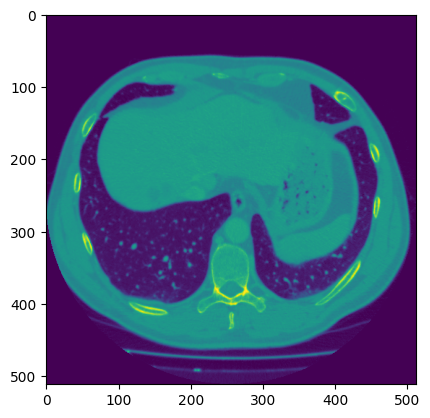

In [22]:
dataset.use_augments = False
inputs = dataset[data_idx]
plt.imshow(inputs["ct_scan"])

In [17]:
inputs["ct_scan"].min()

tensor(0.)

In [18]:
inputs["ct_scan"].max()

tensor(1.)

In [19]:
inputs["ct_scan"].shape

torch.Size([512, 512])

In [23]:
TF.center_crop(inputs["ct_scan"].unsqueeze(0), (500, 500)).squeeze().shape

torch.Size([500, 500])

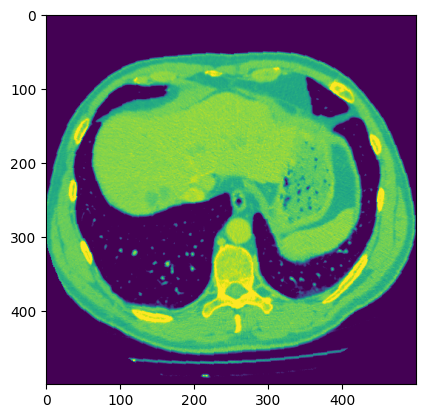

In [21]:
plt.imshow(TF.center_crop(inputs["ct_scan"].unsqueeze(0), (500, 500)).squeeze())

Adjusting sharpness by 2.4014071822166443
Rotating by -5 degrees
['artery', 'bone', 'liver', 'livertumor', 'portalvein', 'skin', 'venacava']


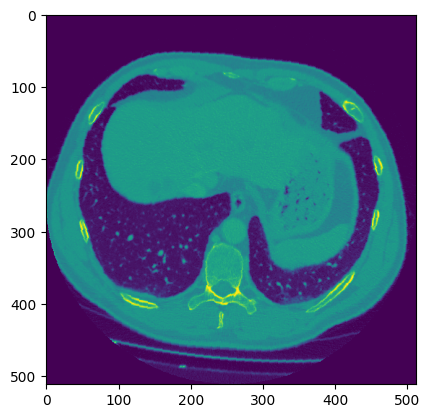

In [10]:
dataset.use_augments = True
inputs = dataset[data_idx]
plt.imshow(inputs["ct_scan"])
print(inputs["organs"])

Adding gaussian noise with kernel [3, 9]
['artery', 'bone', 'liver', 'livertumor', 'portalvein', 'skin', 'venacava']


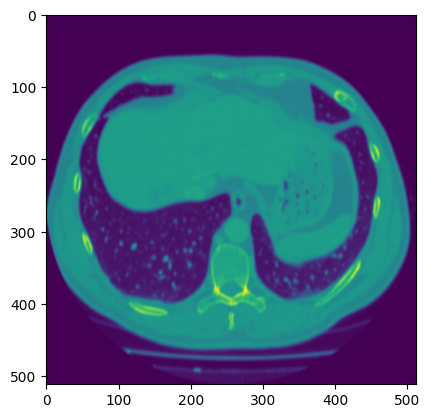

In [11]:
dataset.use_augments = True
inputs = dataset[data_idx]
plt.imshow(inputs["ct_scan"])
print(inputs["organs"])

Rotating by 4 degrees
['artery', 'bone', 'liver', 'livertumor', 'portalvein', 'skin', 'venacava']


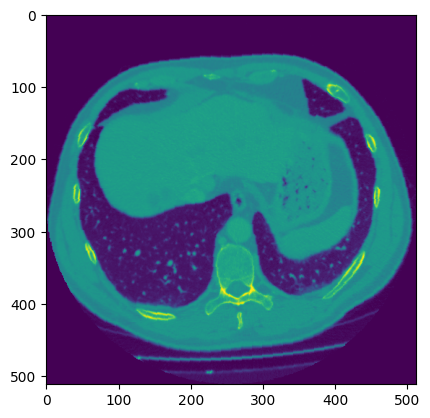

In [12]:
dataset.use_augments = True
inputs = dataset[data_idx]
plt.imshow(inputs["ct_scan"])
print(inputs["organs"])

Adjusting contrast by 1.9330222308635712
Adjusting sharpness by 1.1179648041725159
Rotating by 3 degrees
['artery', 'bone', 'liver', 'livertumor', 'portalvein', 'skin', 'venacava']


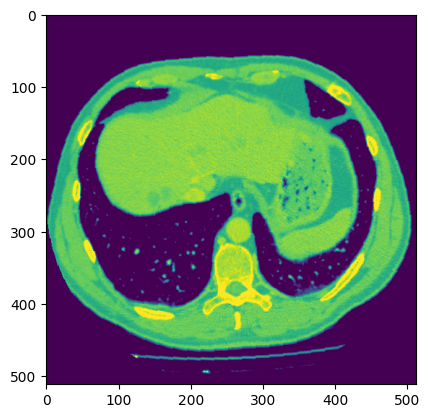

In [13]:
dataset.use_augments = True
inputs = dataset[data_idx]
plt.imshow(inputs["ct_scan"])
print(inputs["organs"])

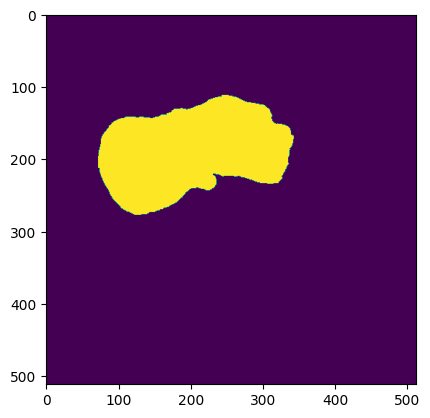

In [14]:
bone_idx = dataset.labels.index("liver")
plt.imshow(inputs["masks"][bone_idx] * 255)

In [15]:
inputs["masks"][bone_idx].sum()

tensor(29587.)

In [16]:
inputs["metadata"]

{'image_name': 'image_102',
 'study_datetime': '2009-05-27T13:00:41',
 'gender': 'M',
 'pixel_spacing': [0.671000003814697, 0.671000003814697],
 'slice_thickness': 1.600000023841858,
 'image_number': 102,
 'image_position': [0, 0, 163.20000243187],
 'image_orientation': [1, 0, 0, 0, 1, 0],
 'patient_id': '3Dircadb1.13'}

In [38]:
import numpy as np
u = 7.26e-4
x_next = 0
split = 13_000
num_vals = 100_051
for i in range(0, num_vals, split):
    print(min(split + i, num_vals) - i)
#     print(min(100_000 - i+10_000, 10_000))
#     rand_vals = np.random.rand((10_000))
#     surviving_cells = rand_vals <= (1 - u)
#     x_next += surviving_cells.sum()

13000
13000
13000
13000
13000
13000
13000
9051


In [27]:
x_next

99941